/var/folders/y4/qcnd0kls2lv5vrpxsctlz3c00000gn/T/ipykernel_98148/539785664.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_data_cleaned["GeoName"] = income_data_cleaned["GeoName"].str.strip()


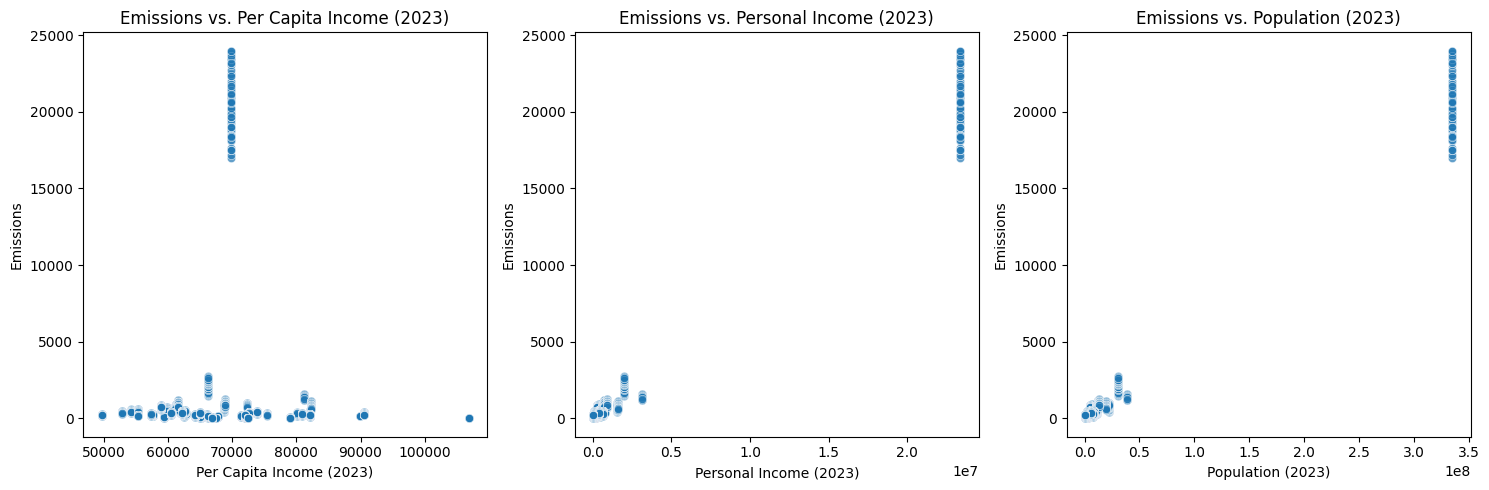

Random Forest:
MSE: 100264.08170494408, R2: 0.9866819167986796
Feature Importance: [0.00122282 0.62982919 0.36894799]

Linear Regression:
MSE: 135216.72788182553, R2: 0.9820391549843351

Gradient Boosting:
MSE: 102955.98891689106, R2: 0.9863243506233422
Feature Importance: [0.00208642 0.56065307 0.43726052]


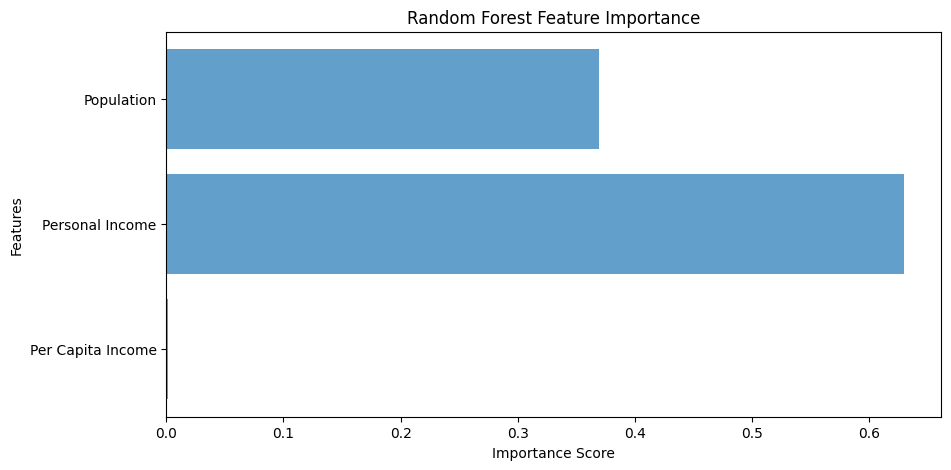

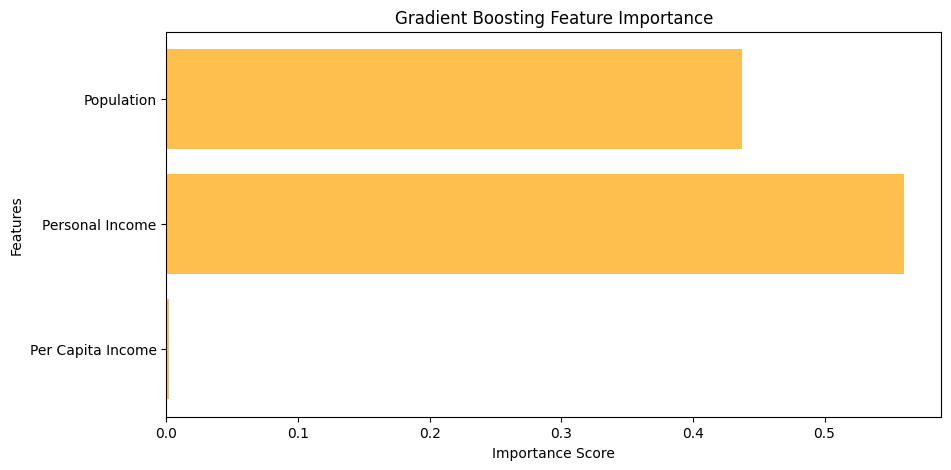

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

income_data = pd.read_csv('income_pop_capitaI__ALL_AREAS_1929_2023.csv')
emissions_data = pd.read_csv('emissions.csv')

income_data_cleaned = income_data.dropna(subset=["GeoName"])
income_data_cleaned["GeoName"] = income_data_cleaned["GeoName"].str.strip()

income_2023 = income_data_cleaned[["GeoName", "Description", "2023"]].pivot(
    index="GeoName", columns="Description", values="2023"
).reset_index()
income_2023.columns = [
    "state-name", "per_capita_income_2023", "personal_income_2023", "population_2023"
]

emissions_summary = emissions_data.groupby(["state-name", "year"]).agg({"value": "sum"}).reset_index()

merged_data = pd.merge(
    emissions_summary,
    income_2023,
    on="state-name",
    how="inner"
)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(
    data=merged_data,
    x="per_capita_income_2023",
    y="value",
    alpha=0.7
)
plt.title("Emissions vs. Per Capita Income (2023)")
plt.xlabel("Per Capita Income (2023)")
plt.ylabel("Emissions")

plt.subplot(1, 3, 2)
sns.scatterplot(
    data=merged_data,
    x="personal_income_2023",
    y="value",
    alpha=0.7
)
plt.title("Emissions vs. Personal Income (2023)")
plt.xlabel("Personal Income (2023)")
plt.ylabel("Emissions")

plt.subplot(1, 3, 3)
sns.scatterplot(
    data=merged_data,
    x="population_2023",
    y="value",
    alpha=0.7
)
plt.title("Emissions vs. Population (2023)")
plt.xlabel("Population (2023)")
plt.ylabel("Emissions")

plt.tight_layout()
plt.show()

features = merged_data[["per_capita_income_2023", "personal_income_2023", "population_2023"]]
target = merged_data["value"]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

gbr_model = GradientBoostingRegressor(random_state=42, n_estimators=100)
gbr_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_gbr = gbr_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

rf_importance = rf_model.feature_importances_
gbr_importance = gbr_model.feature_importances_

print("Random Forest:")
print(f"MSE: {mse_rf}, R2: {r2_rf}")
print(f"Feature Importance: {rf_importance}")

print("\nLinear Regression:")
print(f"MSE: {mse_lr}, R2: {r2_lr}")

print("\nGradient Boosting:")
print(f"MSE: {mse_gbr}, R2: {r2_gbr}")
print(f"Feature Importance: {gbr_importance}")

plt.figure(figsize=(10, 5))
plt.barh(["Per Capita Income", "Personal Income", "Population"], rf_importance, alpha=0.7)
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(["Per Capita Income", "Personal Income", "Population"], gbr_importance, alpha=0.7, color="orange")
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
